In [9]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing


In [10]:
#Defining the Mean Absolute Percentage Error Function
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [11]:
Petrol              =  pd.read_csv('Petrol.csv')

Petrol.head()

,Year,Quarter,Consumption
0,2001,Q1,14.978
1,2001,Q2,11.099
2,2001,Q3,10.057
3,2001,Q4,10.454
4,2002,Q1,9.295


In [12]:
#Defining the date range and specifying that it is a Quarterly Time Stamped date
date_rng            =  pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')
print(date_rng)

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')


In [17]:
Petrol['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
print(Petrol.head(3).T)

                               0                    1                    2
Year                        2001                 2001                 2001
Quarter                       Q1                   Q2                   Q3
Consumption               14.978               11.099               10.057
TimeIndex    2001-03-31 00:00:00  2001-06-30 00:00:00  2001-09-30 00:00:00


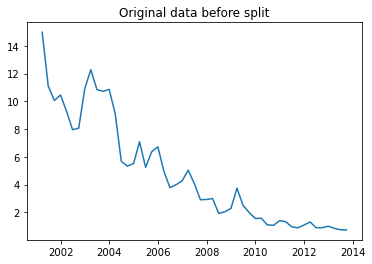

In [15]:
#Plotting the time series
plt.plot(Petrol.TimeIndex, Petrol.Consumption)
plt.title('Original data before split')
plt.show()

In [19]:
#Creating train and test set 

train             = Petrol[0:int(len(Petrol)*0.7)] #70% of the data for training the model
test              = Petrol[int(len(Petrol)*0.7):] #30% of the data for evaluating the model

In [20]:
#Printing the beginning and the ending of the training data
print("\n Training data start at \n")
print (train[train.TimeIndex == train.TimeIndex.min()],['Year','Quarter'],'\n')
print("\n Training data ends at \n")
print (train[train.TimeIndex == train.TimeIndex.max()],['Year','Quarter'],'\n')


 Training data start at 

   Year Quarter  Consumption  TimeIndex
0  2001      Q1       14.978 2001-03-31 ['Year', 'Quarter'] 


 Training data ends at 

    Year Quarter  Consumption  TimeIndex
34  2009      Q3      1.98159 2009-09-30 ['Year', 'Quarter'] 

